#Preliminary imports and tree-node structure

In [ ]:
#This code is built using google collab and Each task of the assignment is being implemented in a cell, so its best to run it on the google collab platform.
import numpy as np
import pandas as pd
from google.colab import files      #comment this if not using google collab
import matplotlib.pyplot as plt
%matplotlib inline

import copy
import math
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

#Tree Node structure
class Tree_Node:
  def __init__(self,Attr_index, threshold, leaf):
    self.Attribute_index = Attr_index           #or class if leaf node
    self.threshold = threshold          #or None if leaf node
    self.leaf_node = leaf                         #True for leaf node
    self.left_P = None
    self.right_P = None
    self.class_distribution = {}        #dict
  

#Taking the input dataset

In [ ]:
from google.colab import files      #comment this if not using google collab
uploaded = files.upload()           #comment this if not using google collab

import io
df = pd.read_csv(io.BytesIO(uploaded['bupa.csv']),header=None)      #comment this if not using google collab

#Reading file from local computer
#df = pd.read_csv('bupa.csv',header=None)

Saving bupa.csv to bupa.csv


#Sepearting Target column

In [ ]:
df.drop([df.columns[-1]],axis=1,inplace = True)
df=df.sample(frac=1)        #shuffling data
Target_set = np.array(df.iloc[:,-1])
Train_set = np.array(df.drop([df.columns[-1]],axis=1))
for i in range(len(Target_set)):
  if Target_set[i] > 5:
    Target_set[i] = 1
  else:
    Target_set[i] = 2


#Spliting the Data into training and testing set

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(Train_set, Target_set, test_size = 0.2)
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

#Building the tree with default criteria as 'Gini'.

In [ ]:
model = Decision_tree(x_train, y_train, x_test, y_test, criteria= 'IG')
model.fit()

#calculating the accuracy of the model



In [ ]:
print('Accuracy: ' + str(model.score()) + ', nodes in the tree: ' + str(model.total_nodes()))

Accuracy: 0.7536231884057971, nodes in the tree: 103


#Finding accuracy over 10 random splits: Q2 solution

In [ ]:
score_list = []
score_list2 = []
best_model = 0
best_score = 0
models = []
for _ in range(10):
  x_train, x_test, y_train, y_test = train_test_split(Train_set, Target_set, test_size = 0.2)
  x_train = np.array(x_train)
  y_train = np.array(y_train)
  x_test = np.array(x_test)
  y_test = np.array(y_test)

  #Train model
  modeli = Decision_tree(x_train, y_train, x_test, y_test)
  modeli.fit()
  models.append(modeli)
  s = modeli.score()
  score_list.append(s)
  if best_score < s:
    best_model = copy.deepcopy(modeli)
    best_score = s 
  
  modelj = Decision_tree(x_train, y_train, x_test, y_test,criteria = 'Information Gain')
  modelj.fit()
  s = modelj.score()
  score_list2.append(s)
  if best_score < s:
    best_model = copy.deepcopy(modelj)
    best_score = s 

print("Score1:", end = ' ')
print(*score_list, sep = ', ')

print("Score2:", end = ' ')
print(*score_list2, sep = ', ')

print('Mean of score_list1: ' + str(np.mean(score_list)) + '    SD: ' + str(np.std(score_list)))
print('Mean of score_list1: ' + str(np.mean(score_list2)) + '   SD: ' + str(np.std(score_list2)))

Score1: 0.6811594202898551, 0.7246376811594203, 0.7681159420289855, 0.6666666666666666, 0.6086956521739131, 0.7246376811594203, 0.6521739130434783, 0.7681159420289855, 0.7246376811594203, 0.782608695652174
Score2: 0.5942028985507246, 0.6376811594202898, 0.6811594202898551, 0.7246376811594203, 0.6956521739130435, 0.6666666666666666, 0.5507246376811594, 0.7246376811594203, 0.6811594202898551, 0.6521739130434783
Mean of score_list1: 0.7101449275362318    SD: 0.053838190205816545
Mean of score_list1: 0.6608695652173914   SD: 0.052334695899326926


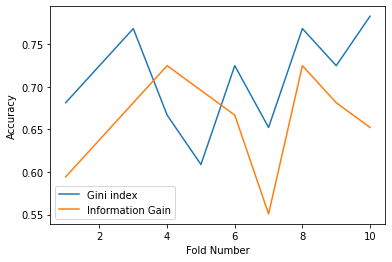

In [ ]:
#plotting graph of accuracy information_gain and Gini index
plt.xlabel('Fold Number')
plt.ylabel('Accuracy')
plt.plot(list(range(1,len(score_list)+1)), score_list, label="Gini index")
plt.plot(list(range(1,len(score_list)+1)), score_list2, label="Information Gain")
plt.legend(loc='best')
plt.savefig('IvsG.png')
#files.download("IvsG.png")

#Finding the accuracy of a tree at various depth limit: Q3 solution


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(Train_set, Target_set, test_size = 0.2)
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)
model = Decision_tree(x_train, y_train, x_test, y_test)
model.fit()
Acc = []      #accuracy
no_of_nodes = []       #nodes
depth_of_the_tree = []       #depth
best_depth_model = 0
best_depth = 0
best_s = 0
for i in range(model.tree_depth(), 0, -1):
  model.prune_at_depth(i)
  s = model.score()
  no = model.total_nodes()
  dep = model.tree_depth()
  Acc.append(s)
  no_of_nodes.append(no)
  depth_of_the_tree.append(dep)
  if best_s < s:
    best_s = s
    best_depth = i
    best_depth_model = copy.deepcopy(model)
  print('Number of nodes: ' +str(no) + ' Accuracy: ' + str(s))




Number of nodes: 109 Accuracy: 0.6811594202898551
Number of nodes: 105 Accuracy: 0.6811594202898551
Number of nodes: 99 Accuracy: 0.6666666666666666
Number of nodes: 91 Accuracy: 0.6956521739130435
Number of nodes: 75 Accuracy: 0.6666666666666666
Number of nodes: 57 Accuracy: 0.6956521739130435
Number of nodes: 41 Accuracy: 0.6956521739130435
Number of nodes: 25 Accuracy: 0.7101449275362319
Number of nodes: 15 Accuracy: 0.7246376811594203
Number of nodes: 7 Accuracy: 0.7536231884057971
Number of nodes: 3 Accuracy: 0.6811594202898551


In [ ]:
for i in range(len(Acc)):
  print('Depth of the tree: ' + str(depth_of_the_tree[i]) + ', Number of nodes: ' +str(no_of_nodes[i]) + ', Accuracy: ' + str(Acc[i]))


Depth of the tree: 11, Number of nodes: 109, Accuracy: 0.6811594202898551
Depth of the tree: 10, Number of nodes: 105, Accuracy: 0.6811594202898551
Depth of the tree: 9, Number of nodes: 99, Accuracy: 0.6666666666666666
Depth of the tree: 8, Number of nodes: 91, Accuracy: 0.6956521739130435
Depth of the tree: 7, Number of nodes: 75, Accuracy: 0.6666666666666666
Depth of the tree: 6, Number of nodes: 57, Accuracy: 0.6956521739130435
Depth of the tree: 5, Number of nodes: 41, Accuracy: 0.6956521739130435
Depth of the tree: 4, Number of nodes: 25, Accuracy: 0.7101449275362319
Depth of the tree: 3, Number of nodes: 15, Accuracy: 0.7246376811594203
Depth of the tree: 2, Number of nodes: 7, Accuracy: 0.7536231884057971
Depth of the tree: 1, Number of nodes: 3, Accuracy: 0.6811594202898551


#Accuracy vs Depth of the tree

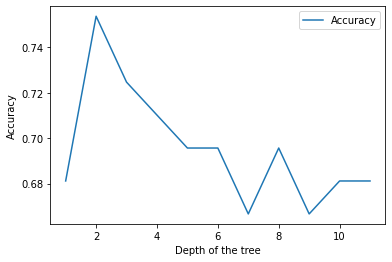

In [ ]:
#plotting graph with respect of the tree depth
plt.xlabel('Depth of the tree')
plt.ylabel('Accuracy')
plt.plot(depth_of_the_tree, Acc, label="Accuracy")
plt.legend(loc='best')
plt.savefig('A_Depth.png')
#files.download("A_Depth.png")

#Accuracy vs number of nodes in the tree

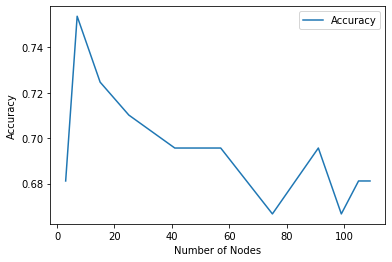

In [ ]:
#plotting graph with respect of number of nodes
plt.xlabel('Number of Nodes')
plt.ylabel('Accuracy')
plt.plot(no_of_nodes, Acc, label="Accuracy")
plt.legend(loc='best')
plt.savefig('N_Depth.png')
#files.download("N_Depth.png")

#Using Error-complexity Pruning method to prune the best tree out of 10 previous folds: Q4 solution

Accuracy on Training Data: 1.0 On Testing Data: 0.782608695652174 Nodes: 123
Accuracy on Training Data: 0.9963768115942029 On Testing Data: 0.782608695652174 Nodes: 117
Accuracy on Training Data: 0.9927536231884058 On Testing Data: 0.782608695652174 Nodes: 111
Accuracy on Training Data: 0.9855072463768116 On Testing Data: 0.782608695652174 Nodes: 103
Accuracy on Training Data: 0.9818840579710145 On Testing Data: 0.782608695652174 Nodes: 99
Accuracy on Training Data: 0.9782608695652174 On Testing Data: 0.782608695652174 Nodes: 95
Accuracy on Training Data: 0.9746376811594203 On Testing Data: 0.782608695652174 Nodes: 91
Accuracy on Training Data: 0.9710144927536232 On Testing Data: 0.782608695652174 Nodes: 87
Accuracy on Training Data: 0.967391304347826 On Testing Data: 0.782608695652174 Nodes: 83
Accuracy on Training Data: 0.9637681159420289 On Testing Data: 0.7971014492753623 Nodes: 79
Accuracy on Training Data: 0.9528985507246377 On Testing Data: 0.8115942028985508 Nodes: 69
Accuracy 

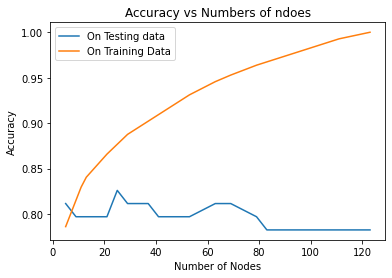

In [ ]:
best_model.fit()        #If rerun, this cell will not give correct output as best_model is pruned to depth1. If want to rerun, uncomment this line
Accuracy_on_test= []
Accuracy_on_training_data= []
nodes = []
while best_model.total_nodes() >= 3:
  Accuracy_on_test.append(best_model.score())
  Accuracy_on_training_data.append(best_model.score_on_training_data())
  nodes.append(best_model.total_nodes())
  best_model.Error_complexity_prunning()

for i in range(len(Accuracy_on_test)):
  print('Accuracy on Training Data: ' + str(Accuracy_on_training_data[i]) + ' On Testing Data: '+str(Accuracy_on_test[i]) + ' Nodes: '+str(nodes[i]))
#print(Accuracy_on_test)
#print(nodes)
#print(Accuracy_on_training_data)

#plotting graph
plt.xlabel('Number of Nodes')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Numbers of ndoes')
plt.plot(nodes, Accuracy_on_test, label="On Testing data")
plt.plot(nodes, Accuracy_on_training_data, label="On Training Data")
plt.legend(loc='best')
plt.savefig('Error_prune.png')
#files.download("Error_prune.png")

#Decison tree with best depth: Q5 solution

In [ ]:
best_depth_model.print_tree()

  ||  Attribute_index[4] <= 59.5  ||   || 
  ||  Attribute_index[0] <= 91.0  ||    ||  Attribute_index[0] <= 90.5  ||   || 
  ||  Class: 2.0      ||  Class: 2.0      ||  Class: 2.0      ||  Class: 1.0     || 


#Decision Tree class: Q1 solution

In [ ]:
class Decision_tree:
  def __init__(self,x_train,y_train,x_test,y_test, criteria = 'Gini', depth = None):
    self.x_train = x_train
    self.y_train = y_train
    self.x_test = x_test
    self.y_test = y_test
    self.depth_limit = depth
    self.root = None
    self.criteria = criteria
    if self.depth_limit is not None:
      self.depth_limit = int(self.depth_limit)
      if self.depth_limit < 0:
        self.depth_limit = -self.depth_limit
    self.possible_prunes = []


  def calculate_entropy(self, train_y):
    uni = np.unique(train_y)
    freq = [0] * len(uni)
    id = list(range(len(uni)))
    species_dict=dict(zip(uni,id))
    for i in range(len(train_y)):
      j = species_dict[train_y[i]]
      freq[j] = freq[j] + 1
    entropy = 0
    for i in freq:
      if i == 0:
        continue
      entropy = entropy - (i/len(train_y))*math.log((i/len(train_y)),2)
    return entropy
  
  def calculate_Gini_value(self, train_y):
    l = len(train_y)
    uni = np.unique(train_y)
    freq = np.array([0] * len(uni))
    id = list(range(len(uni)))
    species_dict=dict(zip(uni,id))
    for i in range(l):
      j = species_dict[train_y[i]]
      freq[j] = freq[j] + 1
    gini_value = 0
    for i in freq:
      gini_value = gini_value + math.pow(i/l,2)
    gini_value = 1 - gini_value

    return gini_value

  def split_calculate(self, train_x, train_y, threshold, atrr):
    l = len(train_y)
    temp1_y = []        #classes with atrr >= threshold
    
    temp2_y = []      #classes with attr < threshold

    s1 = 0
    s2 = 0
    for i in  range(0,l):
      if train_x[i][atrr] >= threshold:
        temp1_y.append(train_y[i])
        s1 = s1 + 1
      else:
        temp2_y.append(train_y[i])
        s2 = s2 + 1
    entr1 = 0
    entr2 = 0
    if self.criteria == 'Gini':
      entr1 = self.calculate_Gini_value(copy.deepcopy(temp1_y))
      entr2 = self.calculate_Gini_value(copy.deepcopy(temp2_y))
    else:
      entr1 = self.calculate_entropy(copy.deepcopy(temp1_y))
      entr2 = self.calculate_entropy(copy.deepcopy(temp2_y))
    
    return [[s1, entr1],[s2,entr2]]

  def candidates(self, train_x, train_y, attr):
    mp = []
    l = len(train_y)
    for i in range(l):
      mp.append([train_x[i][attr], train_y[i]])
    mp.sort(key = lambda x: x[0])

    #create boolean attributes
    candidate_thresholds=[]
    for i in range(1,l):
      if mp[i][1] != mp[i-1][1]:
        candidate_thresholds.append((mp[i][0] + mp[i-1][0])/2)
    return candidate_thresholds

    
  def impurity_measure(self, train_x, train_y):
    l = len(train_y)
    current_GINI_or_entropy = 0
    if self.criteria == 'Gini':
      current_GINI_or_entropy = self.calculate_Gini_value(copy.deepcopy(train_y))
    else:
      current_GINI_or_entropy = self.calculate_entropy(copy.deepcopy(train_y))
    if current_GINI_or_entropy == 0:                     #check for leaf node or pure node
      return [None, None, 1]
    max_gain = [-1,-1,-1]                                     #attribute index, its threshold value, gain
    no_of_attributes = len(train_x[0])
    for i in range(no_of_attributes):
      candidate_thresholds = self.candidates(copy.deepcopy(train_x),copy.deepcopy(train_y),i)
      max_gain_j = [-1,-1, -1]    #[attr_index, threshold, gain]
      for j in candidate_thresholds:
        entropies_or_gini = self.split_calculate(copy.deepcopy(train_x), copy.deepcopy(train_y), j, i)
        gain_j = 0 
        for k in entropies_or_gini:
          gain_j = gain_j + (k[0]/l)*k[1]
        gain_j = current_GINI_or_entropy - gain_j

        if max_gain_j[2] < gain_j: 
          max_gain_j = [i, j, gain_j]
      if max_gain[2] < max_gain_j[2]:
        max_gain = copy.deepcopy(max_gain_j)

    return max_gain

  def compare(self, A, B, geq):
    if geq == 1:
      return A >= B
    return A < B 

  def partition(self, train_x, train_y, attr, threshold, geq):
    tempX = []
    tempY = []
    l = len(train_x)
    for i in range(l):
      if self.compare(train_x[i][attr] ,threshold ,geq):
        tempX.append(train_x[i])
        tempY.append(train_y[i])
    return [tempX, tempY]
  
  def most_probable_class(self,train_y):
    uni = np.unique(train_y)
    freq = np.array([0] * len(uni))
    id = list(range(len(uni)))
    species_dict=dict(zip(uni,id))
    for i in range(len(train_y)):
      j = species_dict[train_y[i]]
      freq[j] = freq[j] + 1
    max_freq_index = np.argmax(freq)
    class_index = 0
    for key,value in species_dict.items():
      if max_freq_index == value:
        class_index = key
        break
    return class_index

  def R_t(self, rt):
    class_error_if_pruned = 0
    if rt.class_distribution[1] >= rt.class_distribution[2]:
      class_error_if_pruned = rt.class_distribution[2]
    else:
      class_error_if_pruned = rt.class_distribution[1]
    R_t = class_error_if_pruned/len(self.x_train)
    return R_t

  def R_T(self,rt):
    if rt.leaf_node:
      classification = rt.Attribute_index         #class of leaf node
      if classification == 1:
        return rt.class_distribution[2]
      else:
        return rt.class_distribution[1]

    return self.R_T(rt.left_P) + self.R_T(rt.right_P)


  def inorder_tree(self, rt):
    if rt.leaf_node:
      return
    
    self.inorder_tree(rt.left_P)

    R_t_value = self.R_t(rt)
    R_T_value = self.R_T(rt)/len(self.x_train)
    N_t = self.find_no_of_leaf_nodes(rt)

    alpha = (R_t_value - R_T_value)/(N_t - 1)
    self.possible_prunes.append([alpha, rt])

    self.inorder_tree(rt.right_P)

  def Error_complexity_prunning(self):
    self.possible_prunes = []
    self.inorder_tree(self.root)

    getting_pruned = 0
    min_alpha = 1
    l = len(self.possible_prunes)
    for i in range(l):
      if self.possible_prunes[i][0] < min_alpha:
        min_alpha = self.possible_prunes[i][0]
        getting_pruned = self.possible_prunes[i][1]


    #prune subtree with lowest alpha value
    getting_pruned.leaf_node = True
    if getting_pruned.class_distribution[1] >= getting_pruned.class_distribution[2]:
      getting_pruned.Attribute_index = 1
    else:
      getting_pruned.Attribute_index = 2
    getting_pruned.left_P = None
    getting_pruned.right_P = None
    getting_pruned.threshold = None


  def create_dict(self,train_y):
    d = {1 : 0, 2 : 0}
    l = len(train_y)
    for i in range(l):
      d[train_y[i]] = d[train_y[i]] + 1
    return d

  def train_model(self, train_x, train_y, d):
    if self.depth_limit == d:                                               #if self.depth_limit is None then, None == int then it will be false
      return Tree_Node(self.most_probable_class(copy.deepcopy(train_y)), None, True)
    max_gain = self.impurity_measure(copy.deepcopy(train_x),copy.deepcopy(train_y))       #[attr_index, threshold, gain] 
    if max_gain[2] == 1:            #leaf node
      rt = Tree_Node(self.most_probable_class(copy.deepcopy(train_y)), None, True)
      rt.class_distribution = self.create_dict(copy.deepcopy(train_y))
      return rt
    else:
      r = Tree_Node(max_gain[0],max_gain[1],False)
      split1_x, split1_y = self.partition(copy.deepcopy(train_x), copy.deepcopy(train_y), max_gain[0], max_gain[1], 1)
      split2_x, split2_y = self.partition(copy.deepcopy(train_x), copy.deepcopy(train_y), max_gain[0], max_gain[1], 0)

      r.right_P = self.train_model(copy.deepcopy(split1_x), copy.deepcopy(split1_y),d+1)
      r.left_P = self.train_model(copy.deepcopy(split2_x), copy.deepcopy(split2_y),d+1)

      r.class_distribution = {1 : r.right_P.class_distribution[1] + r.left_P.class_distribution[1], 2 : r.right_P.class_distribution[2] + r.left_P.class_distribution[2]}
      return r

  def fit(self):
    self.root = self.train_model(copy.deepcopy(self.x_train), copy.deepcopy(self.y_train),0)
  
  def predict_class(self, test_row, rt):
    if rt.leaf_node:
      return rt.Attribute_index
    else:
      if self.compare(test_row[rt.Attribute_index], rt.threshold, 1):
        return self.predict_class(test_row,rt.right_P)
      else:
        return self.predict_class(test_row, rt.left_P)

  def predict(self,test_row):
    return self.predict_class(test_row,self.root)
  
  def score(self):
    correct_prediction = 0
    for i in range(0, len(self.y_test)):
      if self.predict(self.x_test[i]) == self.y_test[i]:
        correct_prediction = correct_prediction + 1
    return correct_prediction/len(x_test)
  
  def score_on_training_data(self):
    correct_prediction = 0
    for i in range(0, len(self.y_train)):
      if self.predict(self.x_train[i]) == self.y_train[i]:
        correct_prediction = correct_prediction + 1
    return correct_prediction/len(x_train)
  
  def tree_depth(self):
    return self.find_depth(self.root)

  def find_depth(self, rt):           #not considering leaf nodes in depth
    if rt.leaf_node:
      return 0
    l = self.find_depth(rt.left_P)
    r = self.find_depth(rt.right_P)

    return max(l,r) + 1

  def find_no_of_leaf_nodes(self, rt):      #considering leaf nodes
    if rt is None:
      return 0
    elif rt.leaf_node:
      return 1
    else:
      return self.find_no_of_leaf_nodes(rt.left_P) + self.find_no_of_leaf_nodes(rt.right_P)

  def no_of_leaf_nodes(self):
    return self.find_no_of_leaf_nodes(self.root)
  
  def find_total_nodes(self, rt):
    if rt is None:
      return 0
    elif rt.leaf_node:
      return 1
    else:
      return self.find_total_nodes(rt.left_P) + self.find_total_nodes(rt.right_P) + 1
  
  def total_nodes(self):
    return self.find_total_nodes(self.root)
  
  def prune_tree_at_depth(self, rt, limit, curr_depth, train_x, train_y):
    if rt is None:
      return
    elif rt.leaf_node:
      return
    elif curr_depth < limit:
      split1_x, split1_y = self.partition(copy.deepcopy(train_x), copy.deepcopy(train_y), rt.Attribute_index, rt.threshold, 1)
      split2_x, split2_y = self.partition(copy.deepcopy(train_x), copy.deepcopy(train_y), rt.Attribute_index, rt.threshold, 0)

      self.prune_tree_at_depth(rt.right_P, limit, curr_depth + 1, copy.deepcopy(split1_x), copy.deepcopy(split1_y))
      self.prune_tree_at_depth(rt.left_P, limit, curr_depth + 1, copy.deepcopy(split2_x), copy.deepcopy(split2_y))
    else:                                                                                                           #make it to a leaf node
      rt.leaf_node = True
      rt.Attribute_index = self.most_probable_class(copy.deepcopy(train_y))
      rt.threshold = None
      rt.left_P = None
      rt.right_P = None

  def prune_at_depth(self, d):
    self.prune_tree_at_depth(self.root, d, 0,copy.deepcopy(self.x_train) ,copy.deepcopy(self.y_train))
    self.depth_limit = d
    #print('depth = ' + str(self.find_depth(self.root)))

  def rightmost_nodes(self,rt,l):
    if rt is None:
      return
    l.append(rt)
    self.rightmost_nodes(rt.right_P,l)
  def right_mostnode_true(self,rt,l):
    for i in l:
      if i == rt:
        return True
    return False

  def BFS_On_tree(self, q):
    l = []
    self.rightmost_nodes(self.root,l)
    x = 1
    while len(q) != 0:
      rt = q.pop(0)
      if rt.leaf_node:
        print('  ||  Class: ' + str(rt.Attribute_index), end = '    ')
      else:
        print('  ||  Attribute_index[' + str(rt.Attribute_index) + '] <= ' + str(rt.threshold), end = '  ||  ')
        q.append(rt.left_P)
        q.append(rt.right_P)
      if self.right_mostnode_true(rt, l):
        print(' || ')
      x = x + 1

  def print_tree(self):
    queue = []
    queue.append(self.root)
    self.BFS_On_tree(queue)


